In [ ]:
# !pip3 install  textblob
# python -m textblob.download_corpora
from textblob import TextBlob
import nltk

# Lematização


In [ ]:
texto = TextBlob('O avião vai flying longe')
texto.noun_phrases
texto.words[3].lemmatize('v') #verbo
# texto.words[3].lemmatize('n') #substantivo


**********************************************************************
  Resource brown not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('brown')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/brown

  Searched in:
    - '/home/jovyan/nltk_data'
    - '/usr/local/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
# Tokenização mais simples

texto.words

WordList(['O', 'avião', 'vai', 'flying', 'longe'])

In [ ]:
#lemmatização
texto = TextBlob("when I went out I found out my love")

for palavra in texto.words:
    
        print(palavra.lemmatize('v')) #v indica lemmatizar os verbos

when
I
go
out
I
find
out
my
love


In [ ]:
b = TextBlob("I havv goood speling!")
print(b.correct())

I have good spelling!


In [ ]:
#contagem de ocorrências

texto = TextBlob("Quando tudo parecia longe, o horizonte sumiu com tudo, aí tudo fez sentido. Tudo é tão igual agora!")

texto.word_counts['tudo']

4

In [ ]:
texto.words.count('tudo', case_sensitive=True)

3

In [ ]:
for s in texto.sentences:
    print(s)
    print("---- Início da sentença em {}, fim em {}".format(s.start, s.end))

Quando tudo parecia longe, o horizonte sumiu com tudo, aí tudo fez sentido.
---- Início da sentença em 0, fim em 75
Tudo é tão igual agora!
---- Início da sentença em 76, fim em 99


# Análise de sentimentos 

In [ ]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

conjuntoDeTreino = [
     ('Eu amo coca cola.', 'Bom'),
     ('O filme foi muito bom', 'Bom'),
     ('Que alegria te ver.', 'Bom'),
     ('Não como isso nunca mais', 'Ruim'),
     ('Estou cansado.', 'Ruim'),
     ("Não aguento mais", 'Ruim'),
     ("Meu chefe é horrível.", "Ruim")
 ]

classificador = NaiveBayesClassifier(conjuntoDeTreino)
classificador.classify("Eu odeio meu chefe") #não é o Cocão!




'Ruim'

In [ ]:
blob = TextBlob("Beber é muito bom. A ressaca é horrível.", classifier=classificador)

for s in blob.sentences:
     print(s)
     print(s.classify())

Beber é muito bom.
Bom
A ressaca é horrível.
Ruim


In [ ]:

conjuntoDeTeste = [
     ('Eu amo abacate', 'Bom'),
    ('Eu adoro agua','Bom')
 ]


classificador.accuracy(conjuntoDeTeste)

1.0

# Aplicação de um analisador de sentimentos do Twitter

In [ ]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
!pip3 install tweepy
import os
import tweepy as tw
import pandas as pd

APIkey= '2xmZzKzI5XSydWu7bF0nAuFOn'
APIkeysecret= 'drzoukxLeVRnXGcqbfZehepnWClVS1gHWkg4jvBmG7l3Z5ZSp2'

access_token= '1307181393479380993-bbejpwItu84p6KLSRdRTqT2Nmv4L49'
access_token_secret= 'qxstwRWL7hF9vYKLND1rOaCIHDylz8extTN7LK60wP6Ms'

auth = tw.OAuthHandler(APIkey, APIkeysecret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth, wait_on_rate_limit=True)



You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
termoDeBusca = "amor" #é  a classe do 'sentimento'
a_partir_de = "2021-01-01"

#O Cursor retorna um objeto que pode ser iterado. Várias informações podem ser extraídas, como: 
# o texto do tweet (conteudo)
#o autor do tweet
#quando foi publicado

tweets = tw.Cursor(api.search, #vou fazer uma busca no api do Twitter
              q=termoDeBusca, #com o termo que está na variável termoDeBusca
              lang="pt", #somente em portugues do Brasil
              since=a_partir_de).items(1) #e a partir desta data na variavel a_partir_de
                                     #.item(10) indica que só quer 10 tweets

# tweets



import nltk
tokenizer = nltk.tokenize.TreebankWordTokenizer()

for tweet in tweets:
    strBuscada = str(tweet.text).lower()
    
    print('\n'+strBuscada)
    texto = strBuscada
    tokens = tokenizer.tokenize(strBuscada)
#     print(tokens)
    
    

# nltk.download("stopwords")
from nltk.corpus import stopwords
# print(stopwords.words("portuguese"))
        
stpwords = set(stopwords.words("portuguese"))
textoLimpo = []

for token in list(tokens):
    if token not in stpwords:
        textoLimpo.append(token)

#         print(tokens)
print('\n Texto limpo...')
print(textoLimpo)


rt @vickmethjk: jimin: yoongi, vamos jogar um jogo?

yoongi: ah, bora 

jimin: funciona assim: a gnt vai fingir que tá namorando, só que o…

 Texto limpo...
['rt', '@', 'vickmethjk', ':', 'jimin', ':', 'yoongi', ',', 'vamos', 'jogar', 'jogo', '?', 'yoongi', ':', 'ah', ',', 'bora', 'jimin', ':', 'funciona', 'assim', ':', 'gnt', 'vai', 'fingir', 'tá', 'namorando', ',', 'o…']


     |████████████████████████████████| 366 kB 17.9 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


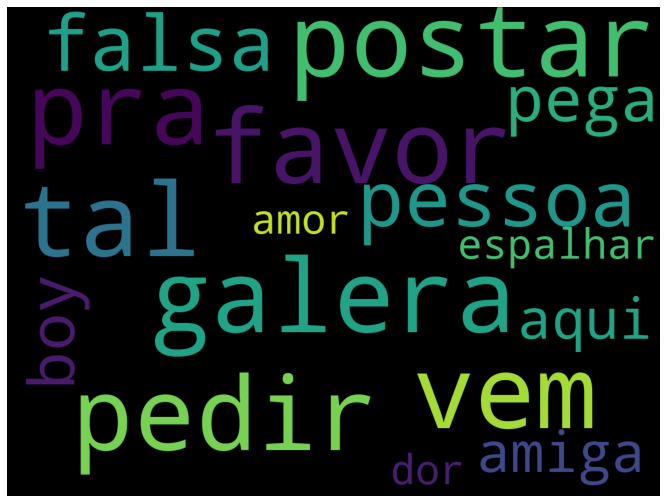

In [ ]:
!pip3 install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# conteudo = open('entrada.txt','r').read()
wordcloud = WordCloud(max_font_size=200,width = 1280, height = 960).generate(' '.join([str(token) for token in textoLimpo]))

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
# termo de busca
arrayTermosDeBusca = ['amor','ódio','revolta','perdão']
# dois termos de busca sobre sentimentos positivos
#dois termos de busca sobre sentimentos negativos
stpwords = set(stopwords.words("portuguese"))


localizacao = []
todosTweets = []

for termo in arrayTermosDeBusca:
    termoDeBusca = termo #é  a classe do 'sentimento'
    a_partir_de = "2021-01-01"

    
    tweets = tw.Cursor(api.search, #vou fazer uma busca no api do Twitter
              q=termoDeBusca, #com o termo que está na variável termoDeBusca
              lang="pt", #somente em portugues do Brasil
              since=a_partir_de).items(10) #e a partir desta data na variavel a_partir_de

#     localizacao = [[tweet.user.screen_name, tweet.user.location, tweet.created_at,tweet.text,termoDeBusca] for tweet in tweets]
#     pdTweet = pd.DataFrame(data=localizacao, columns=['Nome', "Localização",'Data','Tweet','classe'])

# pdTweet



    localizacao = localizacao + [[tweet.text,termoDeBusca] for tweet in tweets]   
    pdTweet = pd.DataFrame(data=localizacao, columns=['Tweet','classe'])

pdTweet


,Tweet,classe
0,"RT @sabiafalandu: Não é sexo, não é beleza, nã...",amor
1,RT @cunhasilvam: Não te quero pedir para ficar...,amor
2,RT @yayayongbok: Pelo amor de deus eu vi esse ...,amor
3,RT @gabrielmaraj: gente quando forem dar unf p...,amor
4,"RT @bestofsterella: ""quando muitos não acredit...",amor
5,RT @anakkth: ⚠️⚠️⚠️⚠️⚠️⚠️PELO AMOR DE DEUS ME ...,amor
6,RT @lmjbo: pelo amor de deus não deixem os hat...,amor
7,"Até quem não tá sofrendo por amor, sofre ouvin...",amor
8,RT @_marianaflopes: Vão por amor de deus votar...,amor
9,RT @Ficantesfalandu: vontade de receber uma qu...,amor


In [ ]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

conjuntoDeTreino = pdTweet[['Tweet','classe']].values.tolist()




# print(conjuntoDeTreino)
classificador = NaiveBayesClassifier(conjuntoDeTreino)



classificador.classify("O mundo é horrível")



'perdão'